# Test méthode classique de débruitage

## Fonction Gaussienne

In [165]:
# Import des modules
import os
import random
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from scipy import ndimage

In [166]:
# Bloc de définition des fonctions

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Ajout de bruit gaussinen à une image
# (https://medium.com/@ms_somanna/guide-to-adding-noise-to-your-data-using-python-and-numpy-c8be815df524)
def add_noise(image, mu=0, sigma=25):  # mu = 0 pour que l'image soit centrée et sigma = 25 pour un bruit gaussien
   
    noise = np.random.normal(mu, sigma, image.shape)
    image_noised = image + noise
    
    return image_noised

# Affichage histogramme d'une image
def display_histogram(image):
    plt.figure()
    plt.hist(image.flatten(), bins=256, range=(0,256), density=True, color='black', alpha=0.75)
    plt.title('Histogramme')
    plt.xlabel('Valeurs des pixels')
    plt.ylabel('Fréquence')
    plt.show()


# Importer une image en niveaux de gris
def display_image(image,title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Fonction gaussienne
def func_gauss(x, y, sigma):
    return (1/(2*np.pi*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))

# Initialisation de la matrice de convolution gaussienne (noyau gaussien)
def convolution_gauss(size, sigma):
    kernel = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            kernel[i,j] = func_gauss(i, j, sigma)

    return kernel

# Affichage de la matrice de convolution gaussienne (noyau gaussien)
def display_kernel(kernel):
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            print(kernel[i,j], end=' ')
        print()


# TEST : Fonction pour faire la convolution d'une image avec un noyau
def op_convolution(input, kernel):
    sum = 0
    if (input.shape[0] != kernel.shape[0] or input.shape[1] != kernel.shape[1]):
        print("Les dimensions de l'image et du noyau ne correspondent pas")
        return None
    for i in range(input.shape[0]):
        for j in range(input.shape[1]):
            sum += input[i,j]*kernel[i,j]
    return sum

def convolution(image, kernel):
    image_conv = np.zeros(image.shape)
    size = kernel.shape[0]
    for i in range(size//2, image.shape[0]-size//2):
        for j in range(size//2, image.shape[1]-size//2):
            image_conv[i,j] = op_convolution(image[i-size//2:i+size//2+1, j-size//2:j+size//2+1], kernel)
    return image_conv

# Filtrer l'image avec un noyau gaussien
def filter_gaussian(image, size, sigma):
    kernel = convolution_gauss(size, sigma)
    image_filtered = convolution(image, kernel)
    return image_filtered

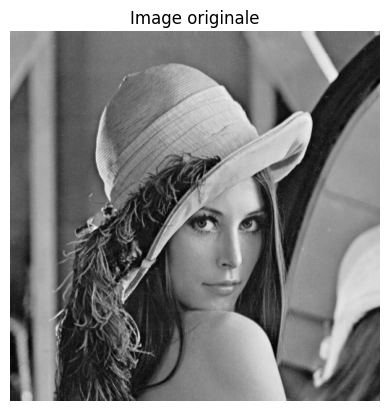

In [167]:
# Bloc de test (Charger une image)

# Importer l'image
filename = 'lena.pgm'
image = import_image(filename)

# Afficher l'image
display_image(image, 'Image originale')

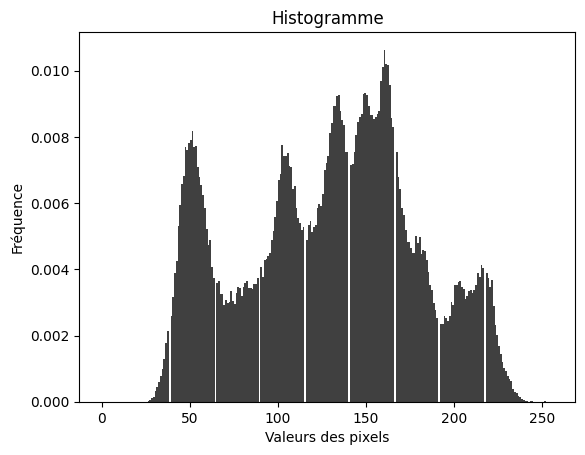

In [168]:
# Bloc de test (Affichage de l'histogramme)

# Affichage de l'histogramme
display_histogram(image)

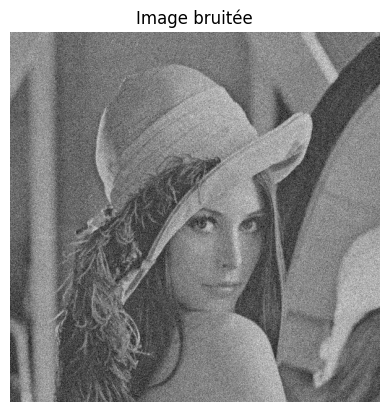

In [169]:
# Bloc de test (Ajout de bruit)

# Ajout de bruit
image_noised_test = add_noise(image)

# Afficher l'image bruitée
display_image(image_noised_test, 'Image bruitée')

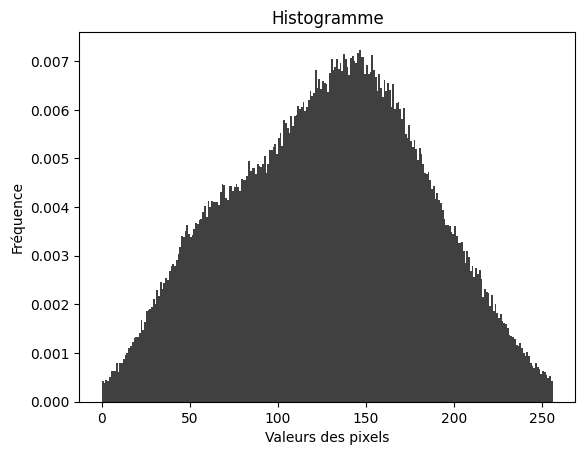

In [170]:
# Bloc de test (Affichage de l'histogramme)

# Affichage de l'histogramme
display_histogram(image_noised_test)

In [171]:
# Bloc de test (Convolution gaussienne)

# Initialisation de la matrice de convolution gaussienne
size = 3
sigma = 1
kernel = convolution_gauss(size, sigma)

# Affichage de la matrice de convolution gaussienne
display_kernel(kernel)

0.15915494309189535 0.09653235263005391 0.021539279301848634 
0.09653235263005391 0.05854983152431917 0.013064233284684921 
0.021539279301848634 0.013064233284684921 0.0029150244650281935 


In [172]:
# Bloc de test (Filtrage de l'image)

# Test de l'opération de convolution
input_test = np.array([[2,1,0],[9,5,4],[2,3,4]])
kernel_test = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

print("Test de l'opération de convolution : ", op_convolution(input_test, kernel_test))

# Test filtrage
input_test = np.array([[2,1,0,2,3],[9,5,4,2,0],[2,3,4,5,6],[1,2,3,1,0],[0,4,4,2,8]])
kernel_test = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

print("Test de la fonction de convolution : ", display(convolution(input_test, kernel_test)))
print("Résultat de la fonction de convolution skiimage: ", display(ndimage.convolve(input_test, kernel_test, mode='constant', cval=0)))

# Résultat : Gestiond des bordures différentes

Test de l'opération de convolution :  -5


array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0., -5.,  0.,  1.,  0.],
       [ 0., -1., -2., -5.,  0.],
       [ 0.,  8., -1.,  3.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

Test de la fonction de convolution :  None


array([[ -6,   7,   2,   1,   4],
       [ -9,   5,   0,  -1,   9],
       [-10,   1,   2,   5,   8],
       [ -9,  -8,   1,  -3,   8],
       [ -6,  -6,   3,  -1,   3]])

Résultat de la fonction de convolution skiimage:  None


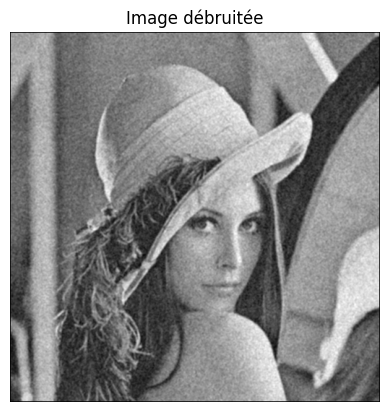

In [173]:
# Bloc principal (Débruitage d'une image avec un noyau gaussien avec ma fonction)

# Importer l'image
filename = 'lena.pgm'
image = import_image(filename)

# Ajout de bruit
image_noised = add_noise(image)

# Filtrage de l'image
image_denoised = filter_gaussian(image_noised, 3, 10)

# Affichage de l'image débruitée
display_image(image_denoised, 'Image débruitée')

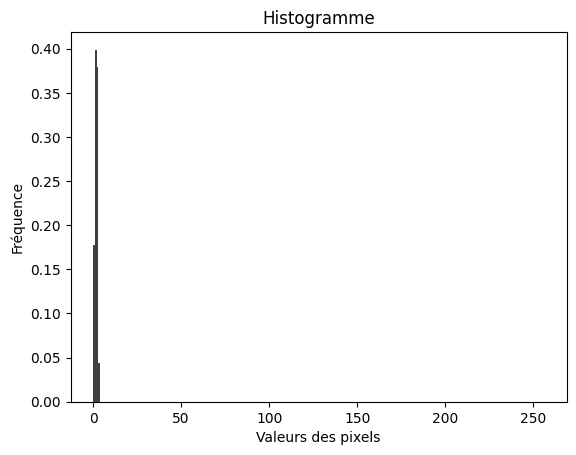

In [174]:
# Bloc principal (Histogramme de l'image débruitée)

# Affichage de l'histogramme
display_histogram(image_denoised)

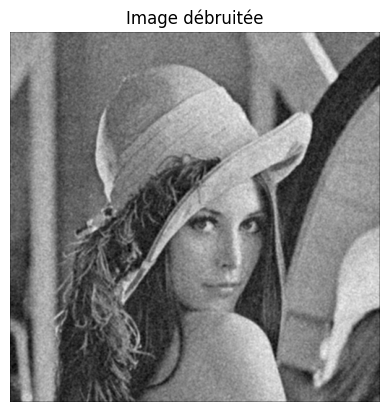

In [175]:
# Bloc principal (Débruitage d'une image avec un noyau gaussien avec ndimage)

# Importer l'image
filename = 'lena.pgm'
image = import_image(filename)

# Ajout de bruit
image_noised_2 = add_noise(image)

# Initialisation du noyau gaussien
size = 3
sigma = 5
kernel = convolution_gauss(size, sigma)

# Filtrage de l'image
image_denoised = ndimage.convolve(image_noised_2, kernel, mode='constant', cval=0)

# Affichage de l'image débruitée
display_image(image_denoised, 'Image débruitée')

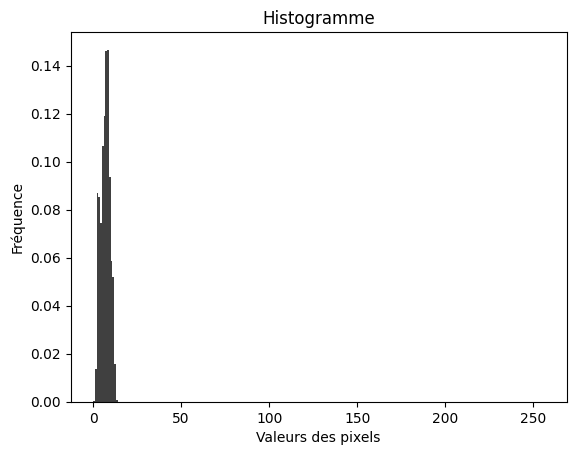

In [176]:
# Bloc principal (Histogramme de l'image débruitée)

# Affichage de l'histogramme
display_histogram(image_denoised)